# Final Project Submission

Please fill out:
* Student name: Beth Mithamo
* Student pace: Part time 
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL: https://github.com/Mythamor/dsc-phase-1-project


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# variable for title basics is tb
tb = pd.read_csv("C:/Users/Home/Desktop/dsc-phase-1-project/zippedData/title.basics.csv")
tb.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [3]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
#check for null values
tb.isna().any()

tconst             False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
dtype: bool

In [5]:
#check for the count of null values
tb.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [6]:
#some years have null values on the entire row, check all available years
tb['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027], dtype=int64)

In [7]:
#drop rows with years above 2022, as most have null values
tb.drop(tb.loc[tb['start_year'] > 2022].index, inplace = True)

In [8]:
tb['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022], dtype=int64)

In [9]:
tb.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31728
genres              5405
dtype: int64

In [10]:
# Most common movie genres
most_popular_genre = tb.genres.value_counts().sort_values(ascending = False)
least_popular_genre = tb.genres.value_counts().sort_values(ascending = True)

print('The totel movie genres are:', len(most_popular_genre))
print (most_popular_genre.head(10))
print (least_popular_genre.head(10))

The totel movie genres are: 1085
Documentary              32185
Drama                    21485
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2218
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64
Adventure,History,War        1
Adventure,Family,Music       1
Adventure,Crime              1
Adult,Drama,Mystery          1
Animation,Music,Mystery      1
Adventure,Musical,Sci-Fi     1
Short,Thriller               1
Biography,Family,News        1
Comedy,Fantasy,Sport         1
Biography,Fantasy,History    1
Name: genres, dtype: int64


In [11]:
# Find statistics of movie runtime minutes
stats_runtime_minutes = tb.runtime_minutes.describe()
stats_runtime_minutes

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [12]:
#movie statistics based on genre
genre_runtime_minutes = tb.groupby(['genres'])['runtime_minutes'].describe()
genre_runtime_minutes

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,1153.0,102.427580,67.662383,45.0,83.00,93.0,120.0,2160.0
"Action,Adult,Comedy",1.0,71.000000,NaN,71.0,71.00,71.0,71.0,71.0
"Action,Adventure",81.0,99.592593,27.547131,13.0,87.00,97.0,111.0,186.0
"Action,Adventure,Animation",173.0,91.502890,22.685828,21.0,80.00,93.0,105.0,240.0
"Action,Adventure,Biography",29.0,83.068966,42.185755,7.0,69.00,88.0,114.0,156.0
...,...,...,...,...,...,...,...,...
"Thriller,War,Western",1.0,55.000000,NaN,55.0,55.00,55.0,55.0,55.0
"Thriller,Western",2.0,95.000000,0.000000,95.0,95.00,95.0,95.0,95.0
War,60.0,93.916667,23.436385,51.0,82.75,94.0,110.0,151.0


In [13]:
mean_runtime_minutes = pd.DataFrame(tb.groupby(['genres'])['runtime_minutes'].mean())
print(pd.DataFrame(mean_runtime_minutes.sort_values(by = ['runtime_minutes'], ascending = False)))

                          runtime_minutes
genres                                   
Drama,Western                  225.342105
Biography,Mystery,Sci-Fi       220.000000
History,Musical,Romance        174.000000
Action,Musical,Romance         170.000000
Musical,Romance,Thriller       165.000000
...                                   ...
Music,Mystery                         NaN
Music,Sci-Fi,Thriller                 NaN
Music,Sport                           NaN
Musical,Mystery                       NaN
Reality-TV,Talk-Show                  NaN

[1085 rows x 1 columns]


In [14]:
# number of films made after 2020
a = tb.loc[tb['start_year'] > 2020]

print(a['genres'].value_counts())

Action                          11
Drama                           11
Animation                       10
Action,Adventure,Fantasy         4
Horror                           4
Animation,Comedy,Family          4
Documentary                      4
Sci-Fi                           3
Comedy                           3
Action,Adventure,Animation       2
Action,Adventure,Thriller        2
Comedy,Drama                     2
Action,Adventure,Sci-Fi          2
Action,Animation,Comedy          2
Action,Sci-Fi                    2
Action,Crime                     2
Adventure,Family,Fantasy         2
Biography                        1
Action,Crime,Drama               1
Action,Crime,Mystery             1
Comedy,Family,Fantasy            1
Western                          1
Adventure,Fantasy                1
Adventure,Horror,Sci-Fi          1
Action,Adventure,Documentary     1
Action,Adventure,Crime           1
Family                           1
Adventure,Biography,Drama        1
Crime,Drama,News    

In [15]:
#length of films that start after 2020
a = tb.loc[tb['start_year'] > 2020]

print(a['runtime_minutes'].value_counts())
print(a['runtime_minutes'].mean())

120.0    3
102.0    1
90.0     1
95.0     1
89.0     1
Name: runtime_minutes, dtype: int64
105.14285714285714


In [16]:
#length of films that start before 2020
b = tb.loc[tb['start_year'] < 2020]

print(b['runtime_minutes'].value_counts())
print(b['runtime_minutes'].mean())

90.0     7104
80.0     3520
85.0     2913
100.0    2657
95.0     2543
         ... 
319.0       1
354.0       1
476.0       1
338.0       1
447.0       1
Name: runtime_minutes, Length: 367, dtype: int64
86.1824329052801


start_year
2022    109.666667
2021    101.750000
2020     91.280488
2019     90.887358
2012     89.208856
2018     87.661099
2011     86.410106
2017     85.732214
2010     85.495694
2015     85.407108
Name: runtime_minutes, dtype: float64


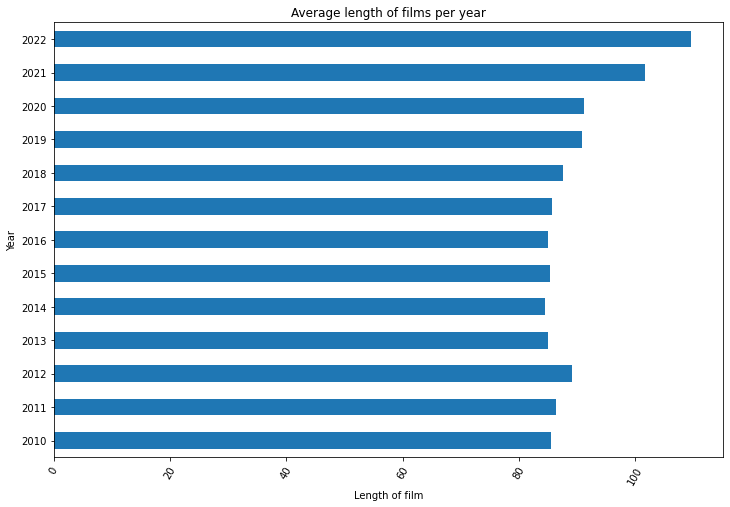

In [17]:
# Average length of films made per year displayed on a horizontal bar graph
length_of_films = tb.groupby(['start_year'])['runtime_minutes'].mean()

length_of_films.plot(kind='barh',figsize = (12,8));
plt.xticks(rotation = 60)
plt.xlabel('Length of film')
plt.ylabel('Year')
plt.title('Average length of films per year')
print (length_of_films.nlargest(10))

In [18]:
#Most common movie genre type
most_common_genre_type = tb['genres'].mode()
most_common_genre_type

0    Documentary
Name: genres, dtype: object

#find average runtime minutes, grouped by genre
grouped_runtime_minutes = tb.groupby(['genres'])['runtime_minutes'].mean()
grouped_runtime_minutes

In [19]:
#movie median length based on genre
median_runtime_minutes = tb.groupby(['genres'])['runtime_minutes'].median().sort_values(ascending = False)
median_runtime_minutes

genres
Biography,Mystery,Sci-Fi     220.0
History,Musical,Romance      174.0
Action,Musical,Romance       170.0
Musical,Romance,Thriller     165.0
Adventure,Animation,Crime    157.0
                             ...  
Music,Mystery                  NaN
Music,Sci-Fi,Thriller          NaN
Music,Sport                    NaN
Musical,Mystery                NaN
Reality-TV,Talk-Show           NaN
Name: runtime_minutes, Length: 1085, dtype: float64

Text(0.5, 1.0, 'Median length of films')

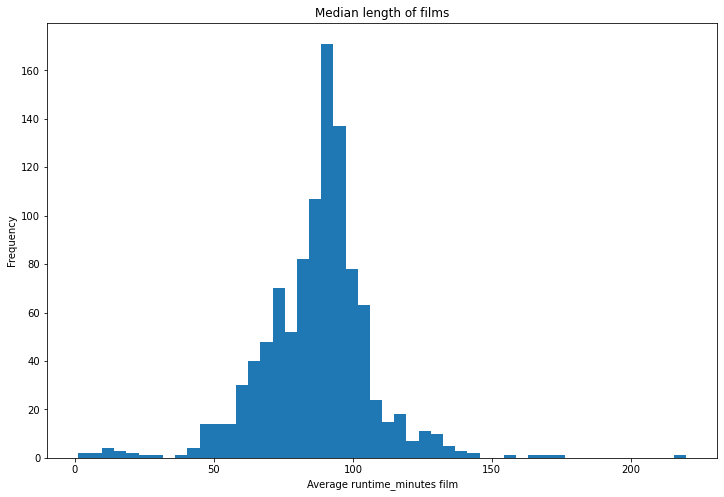

In [20]:
median_runtime_minutes.plot(kind='hist',bins = 50,figsize = (12,8));


plt.xlabel('Average runtime_minutes film')
plt.title('Median length of films')

In [21]:
#fill null values on the runtime minutes column with the median value, based on genres
tb['runtime_minutes'] = tb['runtime_minutes'].fillna(value = tb['runtime_minutes'].median())

In [22]:
#confirm runtime minutes na hae been successfully filled
tb.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5405
dtype: int64

In [23]:
#drop all other rows with null values of original title and genres, because the percentage of missing values to total dataset is meager
tb.dropna(inplace = True)

In [24]:
#confirm all na rows removed
tb.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [25]:
# Top 20 longest films based on genre
top_20 = median_runtime_minutes.nlargest(20)
top_20

genres
Biography,Mystery,Sci-Fi     220.0
History,Musical,Romance      174.0
Action,Musical,Romance       170.0
Musical,Romance,Thriller     165.0
Adventure,Animation,Crime    157.0
Action,Family,Thriller       145.0
Adventure,Horror,Romance     145.0
Action,Animation,Mystery     140.0
War,Western                  138.0
Crime,Musical,Thriller       137.0
Biography,Crime,Thriller     135.0
Action,Drama,Musical         135.0
Comedy,History,Musical       134.0
Action,History,Romance       134.0
Action,Romance               133.0
Action,Mystery,Western       132.0
Family,Musical,Sport         132.0
Action,Family,Mystery        131.0
Adventure,Fantasy,Musical    131.0
Game-Show                    130.0
Name: runtime_minutes, dtype: float64

In [26]:
# shortest films based on genre
short_20 = median_runtime_minutes.nsmallest(20)
short_20

genres
Comedy,Short                      1.0
Animation,Documentary,Horror      4.0
Drama,Horror,Short                7.0
Documentary,Mystery,Romance       7.0
Animation,Documentary,Sci-Fi     10.0
Documentary,Musical,News         11.0
Drama,Short                      14.0
Comedy,Drama,Short               14.0
Music,Reality-TV                 16.0
Short,Thriller                   16.0
Animation,Short                  17.0
Comedy,Romance,Short             19.0
Adventure,Documentary,Fantasy    20.0
Action,Documentary,Romance       26.0
Comedy,Documentary,Reality-TV    31.0
Documentary,Music,Reality-TV     37.0
Action,Documentary,War           40.5
Action,Documentary,Fantasy       43.0
Documentary,Horror,Music         44.0
Documentary,Reality-TV,Sport     44.0
Name: runtime_minutes, dtype: float64

Text(0.5, 1.0, 'Top 20 longest film genres')

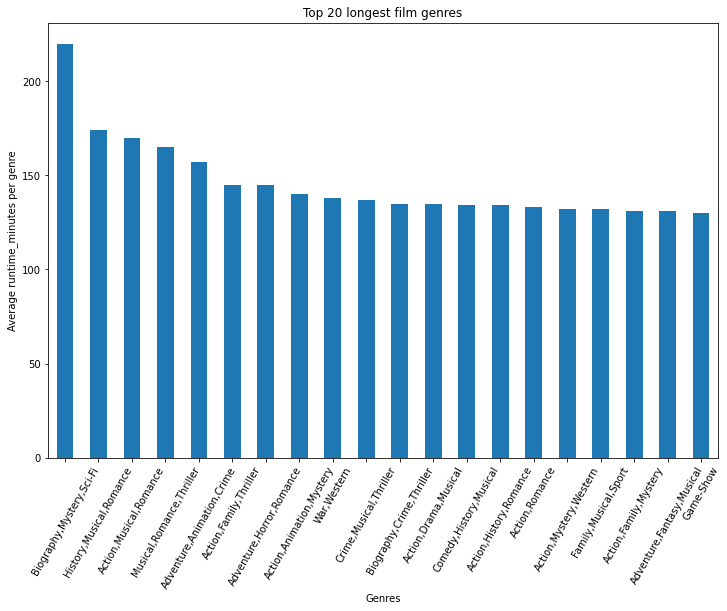

In [27]:
#plot a bar graph showing the average runtime minutes,for the top 20 genres
top_20.plot(kind='bar',figsize = (12,8));
plt.xticks(rotation = 60)
plt.xlabel('Genres')
plt.ylabel('Average runtime_minutes per genre')
plt.title('Top 20 longest film genres')

Text(0.5, 1.0, 'Top 20 genres, average runtime')

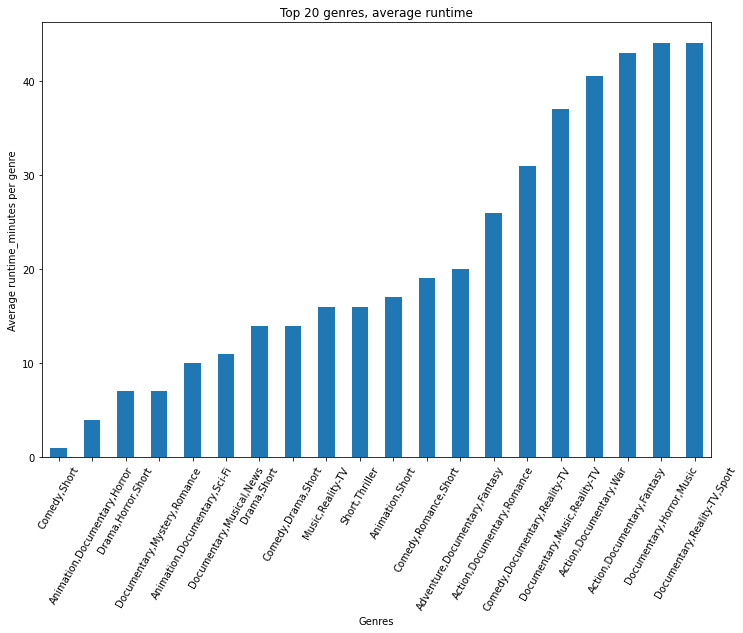

In [28]:
#plot a bar graph showing the average runtime minutes,for 20 shortest genres
short_20.plot(kind='bar',figsize = (12,8));
plt.xticks(rotation = 60)
plt.xlabel('Genres')
plt.ylabel('Average runtime_minutes per genre')
plt.title('Top 20 genres, average runtime')

In [29]:
#find average runtime minutes, grouped by genre and start year
ygrouped_runtime_minutes = tb.groupby(['start_year','genres'])['runtime_minutes'].mean()
ygrouped_runtime_minutes

start_year  genres                    
2010        Action                         93.373418
            Action,Adventure               92.600000
            Action,Adventure,Animation     99.818182
            Action,Adventure,Biography     10.000000
            Action,Adventure,Comedy       102.600000
                                             ...    
2022        Crime,Drama,News               87.000000
            Documentary                    89.000000
            Drama                         120.000000
            Horror                         87.000000
            Sci-Fi                         87.000000
Name: runtime_minutes, Length: 5850, dtype: float64

In [30]:
# Top 20 genres, average runtime based on start year
ytop_20 = ygrouped_runtime_minutes.nlargest(20)
ytop_20

start_year  genres                   
2015        Drama,Western                2533.500000
2018        Drama,Fantasy,Musical         808.000000
2016        Fantasy,Sci-Fi                765.500000
2015        Comedy,Drama,Mystery          480.214286
2017        Comedy,History                432.666667
2018        Action,Sport                  360.000000
2011        Comedy,Sport                  341.166667
2010        Documentary,Drama,News        296.200000
            Biography,Mystery,Sci-Fi      220.000000
2014        Action,Western                204.000000
2017        Documentary,Reality-TV        200.000000
2015        Musical,Romance,Thriller      190.000000
2018        Adventure,Fantasy,Musical     188.000000
2017        Comedy,Drama,Musical          183.166667
2019        Action,Animation,Crime        181.000000
2015        History,Musical,Romance       174.000000
2011        Fantasy,Musical,Sci-Fi        172.000000
2013        Biography,Crime,Thriller      171.000000
2011    

Text(0.5, 1.0, 'Top 20 genres based on start year, average runtime')

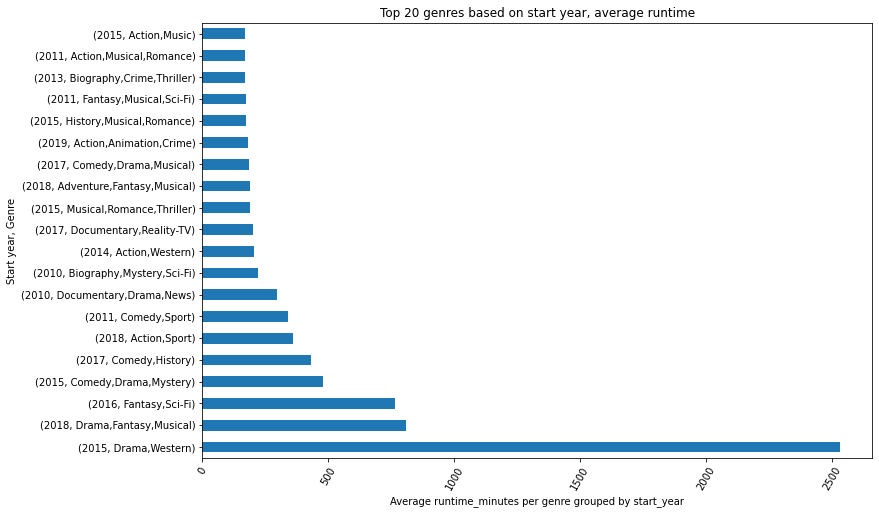

In [31]:
#plot a bar graph showing the average runtime minutes,for the top 10 genres
ytop_20.plot(kind='barh',figsize = (12,8));
plt.xticks(rotation = 60)
plt.xlabel('Average runtime_minutes per genre grouped by start_year')
plt.ylabel('Start year, Genre')
plt.title('Top 20 genres based on start year, average runtime')

In [32]:
sygrouped_runtime_minutes = tb.groupby(['start_year'])['runtime_minutes'].mean()
sygrouped_runtime_minutes

start_year
2010    85.873123
2011    86.672056
2012    89.015274
2013    85.396209
2014    84.968599
2015    85.738262
2016    85.333272
2017    85.947071
2018    87.462681
2019    89.156366
2020    87.386667
2021    87.710843
2022    89.956522
Name: runtime_minutes, dtype: float64

In [33]:
# variable for title ratings is tr
tr = pd.read_csv("C:/Users/Home/Desktop/dsc-phase-1-project/zippedData/title.ratings.csv")
tr

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [34]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [35]:
#Merge the title basics table with the title ratings table
title_basics_and_ratings =pd.merge(tb, tr, left_index=True, right_index=True)

tbr = title_basics_and_ratings 

tbr

,tconst_x,primary_title,original_title,start_year,runtime_minutes,genres,tconst_y,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",tt1043726,4.2,50352
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21
...,...,...,...,...,...,...,...,...,...
73851,tt4206656,MarchFourth Marching Band in China,MarchFourth Marching Band in China,2014,66.0,"Documentary,Music",tt9805820,8.1,25
73852,tt4206658,El Bumbún,El Bumbún,2014,85.0,Drama,tt9844256,7.5,24
73853,tt4206724,70 Acres in Chicago: Cabrini Green,70 Acres in Chicago: Cabrini Green,2014,53.0,"Documentary,History,News",tt9851050,4.7,14
73854,tt4207014,Amante de lo ajeno,Amante de lo ajeno,2012,99.0,Drama,tt9886934,7.0,5


In [36]:
tbr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72062 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst_x         72062 non-null  object 
 1   primary_title    72062 non-null  object 
 2   original_title   72062 non-null  object 
 3   start_year       72062 non-null  int64  
 4   runtime_minutes  72062 non-null  float64
 5   genres           72062 non-null  object 
 6   tconst_y         72062 non-null  object 
 7   averagerating    72062 non-null  float64
 8   numvotes         72062 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ MB


In [37]:
# Movie genres with highest ratings
highest_ratings = tbr.groupby(['genres'])['averagerating'].max().sort_values(ascending = False)
highest_ratings

genres
Comedy,Drama                 10.0
Horror,Thriller              10.0
Documentary                  10.0
Crime,Drama,Horror           10.0
Action,Comedy,Horror         10.0
                             ... 
Action,Horror,Music           3.2
Action,Animation,Music        3.2
Biography,Fantasy,Horror      3.1
Comedy,Documentary,Sci-Fi     3.0
Animation,Family,Music        2.9
Name: averagerating, Length: 946, dtype: float64

The top 20 movies with the highest ratings are: genres
Comedy,Drama                    10.0
Horror,Thriller                 10.0
Documentary                     10.0
Crime,Drama,Horror              10.0
Action,Comedy,Horror            10.0
Documentary,News                10.0
Drama                           10.0
Drama,Fantasy                   10.0
Comedy                          10.0
Biography,Documentary           10.0
Documentary,Drama               10.0
Thriller                         9.9
Comedy,Documentary               9.9
Adventure,Documentary,Drama      9.8
Documentary,Family               9.8
Action,Adventure,Sci-Fi          9.8
Drama,Mystery                    9.8
Biography,Documentary,Drama      9.8
Documentary,History,Thriller     9.7
Comedy,Crime,Drama               9.7
Name: averagerating, dtype: float64


Text(0.5, 1.0, 'Top 20 highsest rated movies genres')

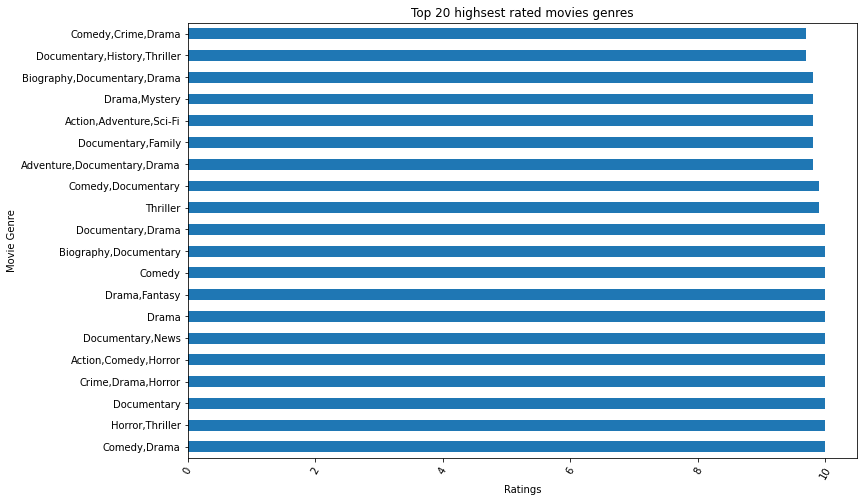

In [38]:
# Plot top 20 movies with the highest ratings
hr = highest_ratings.nlargest(20)
print ('The top 20 movies with the highest ratings are:', hr)

hr.plot(kind='barh',figsize = (12,8));
plt.xticks(rotation = 60)
plt.xlabel('Ratings')
plt.ylabel('Movie Genre')
plt.title('Top 20 highsest rated movies genres')

In [39]:
# Movie genres with ratings statistics
stat_numvotes = tbr.groupby(['genres','start_year'])['averagerating'].describe()
sn= pd.DataFrame(stat_numvotes)
sn.head(20)

count      mean       std  min    25%   50%  \
genres           start_year                                                
Action           2010        127.0  6.507087  1.369809  2.5  5.500  6.70   
                 2011        152.0  6.286842  1.548025  2.1  5.275  6.35   
                 2012        134.0  6.421642  1.299356  1.0  5.900  6.60   
                 2013        139.0  6.453237  1.536715  1.3  5.650  6.70   
                 2014        142.0  6.409155  1.386966  1.3  5.700  6.50   
                 2015         64.0  6.025000  1.530847  1.3  5.275  6.20   
                 2016         41.0  6.463415  1.489590  3.0  5.600  6.70   
                 2017         24.0  6.162500  1.711042  2.8  4.650  6.25   
                 2018         21.0  6.490476  1.222663  4.0  5.500  6.60   
                 2019         72.0  6.108333  1.552712  2.3  5.175  6.30   
                 2020         31.0  6.070968  1.386409  2.5  5.450  6.40   
                 2021          4.0  6.300000  0.583095  5.7  6.075  6.20   
                 2022          4.0  5.450000  0.580230  4.9  4.975  5.45   
Action,Adventure 2010          9.0  5.588889  1.914056  2.4  4.300  5.60   
                 2011          8.0  6.325000  1.606905  3.7  5.450  6.75   
                 2012          7.0  6.942857  0.925306  5.8  6.350  6.70   
                 2013         11.0  6.118182  1.477713  3.5  5.600  6.30   
                 2014         11.0  6.800000  1.024695  4.6  6.400  6.90   
                 2015          4.0  6.400000  2.458997  2.8  5.950  7.25   
                 2016          1.0  7.600000       NaN  7.6  7.600  7.60   

                               75%  max  
genres           start_year              
Action           2010        7.500  9.4  
                 2011        7.400  9.3  
                 2012        7.200  9.0  
                 2013        7.500  9.2  
                 2014        7.200  9.2  
                 2015        6.825  8.7  
                 2016        7.100  9.4  
                 2017        7.400  9.3  
                 2018        7.400  8.9  
                 2019        7.300  9.3  
                 2020        6.950  8.3  
                 2021        6.425  7.1  
                 2022        5.925  6.0  
Action,Adventure 2010        7.200  8.0  
                 2011        7.225  8.3  
                 2012        7.500  8.4  
                 2013        7.000  8.1  
                 2014        7.500  8.1  
                 2015        7.700  8.3  
                 2016        7.600  7.6

In [40]:
# Movie genres with ratings statistics
stat_ratings = tbr.groupby(['genres','start_year'])['numvotes'].describe()
x= pd.DataFrame(stat_ratings)
x.head(20)

count          mean           std   min     25%  \
genres           start_year                                                    
Action           2010        127.0   2215.622047   9854.049455   5.0   11.00   
                 2011        152.0   1772.467105  14407.752455   5.0   14.00   
                 2012        134.0    455.932836   1631.470305   5.0   10.25   
                 2013        139.0   3350.381295  20188.043324   5.0   11.00   
                 2014        142.0    722.373239   2242.439840   5.0   15.25   
                 2015         64.0   1136.000000   4752.726983   6.0   16.00   
                 2016         41.0    997.292683   3138.486086   5.0   15.00   
                 2017         24.0   4924.958333  20780.290410   5.0    9.75   
                 2018         21.0    530.666667   1794.779160   5.0   18.00   
                 2019         72.0   2393.680556  14872.441609   6.0   18.50   
                 2020         31.0   7489.419355  31790.550975   5.0   22.50   
                 2021          4.0    379.250000    280.178961   5.0  285.50   
                 2022          4.0    207.500000    180.976057   9.0   77.25   
Action,Adventure 2010          9.0    423.444444    562.410907   9.0   33.00   
                 2011          8.0   1585.000000   3997.908346  37.0   64.00   
                 2012          7.0  12714.285714  33049.884724  13.0   24.00   
                 2013         11.0   4819.545455   8590.236753   8.0   20.50   
                 2014         11.0    606.363636   1288.160104   7.0   15.00   
                 2015          4.0    113.500000    174.969521   6.0   15.00   
                 2016          1.0      5.000000           NaN   5.0    5.00   

                               50%      75%       max  
genres           start_year                            
Action           2010         39.0   344.00   86863.0  
                 2011         69.5   233.00  175601.0  
                 2012         39.0   160.25   11314.0  
                 2013         57.0   381.00  190596.0  
                 2014         50.0   348.50   17206.0  
                 2015         53.0   350.25   29654.0  
                 2016         41.0   244.00   17491.0  
                 2017         35.0   560.50  102126.0  
                 2018         48.0   198.00    8288.0  
                 2019         88.0   196.25  124156.0  
                 2020        126.0   461.50  176499.0  
                 2021        416.5   510.25     679.0  
                 2022        222.5   352.75     376.0  
Action,Adventure 2010         83.0   584.00    1590.0  
                 2011        129.0   331.50   11471.0  
                 2012         39.0   620.50   87659.0  
                 2013         70.0  5894.50   24271.0  
                 2014         49.0   550.50    4321.0  
                 2015         37.0   135.50     374.0  
                 2016          5.0     5.00       5.0

Text(0.5, 1.0, 'Number of ratings submitted each year')

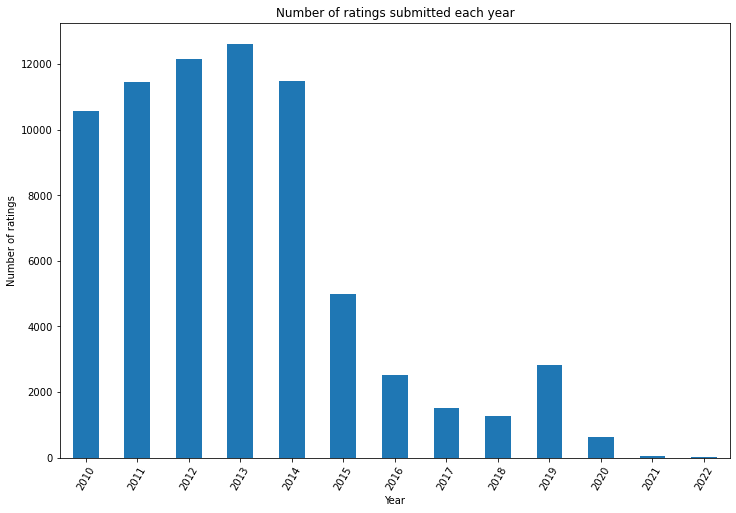

In [41]:
ratings_per_year = tbr.groupby(['start_year'])['averagerating'].count()

ratings_per_year.plot(kind='bar',figsize = (12,8));
plt.xticks(rotation = 60)
plt.xlabel('Year')
plt.ylabel('Number of ratings')
plt.title('Number of ratings submitted each year')

In [42]:
# variable for movie gross is mg
mg = pd.read_csv("C:/Users/Home/Desktop/dsc-phase-1-project/zippedData/bom.movie_gross.csv")
mg

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [43]:
mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [44]:
#Merge the title basics table with the title ratings table
tbr_and_mg = pd.merge(tbr, mg, left_index=True, right_index=True)

Revenue_df = tbr_and_mg

Revenue_df 

,tconst_x,primary_title,original_title,start_year,runtime_minutes,genres,tconst_y,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31,Toy Story 3,BV,415000000.0,652000000,2010
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",tt1043726,4.2,50352,Inception,WB,292600000.0,535700000,2010
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,tt10331828,16 Shots,16 Shots,2019,82.0,Drama,tt1725803,6.2,367,How Victor 'The Garlic' Took Alexey 'The Stud'...,CARUSEL,13000.0,NaN,2018
3376,tt10332008,Makate Must Sell,Makate Must Sell,2019,88.0,"Comedy,Romance",tt1726796,6.5,88,"Lou Andreas-Salomé, the Audacity to be Free",CLS,12900.0,NaN,2018
3383,tt10332120,Much Ado About Nothing,Much Ado About Nothing,2019,130.0,Drama,tt1733300,5.3,15,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,tt10332130,Iron Mom,Iron Mom,2019,87.0,"Action,Thriller",tt1734082,7.8,17,El Pacto,Sony,2500.0,NaN,2018


In [45]:
Revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3208 entries, 0 to 3385
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst_x         3208 non-null   object 
 1   primary_title    3208 non-null   object 
 2   original_title   3208 non-null   object 
 3   start_year       3208 non-null   int64  
 4   runtime_minutes  3208 non-null   float64
 5   genres           3208 non-null   object 
 6   tconst_y         3208 non-null   object 
 7   averagerating    3208 non-null   float64
 8   numvotes         3208 non-null   int64  
 9   title            3208 non-null   object 
 10  studio           3203 non-null   object 
 11  domestic_gross   3180 non-null   float64
 12  foreign_gross    1947 non-null   object 
 13  year             3208 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 375.9+ KB


In [46]:
#highest grossing film
highest_grossing = Revenue_df.groupby(['genres'])['domestic_gross'].sum().reset_index().sort_values(by = ['genres'], ascending=False)

print("Highest Grossing Main Genre is: ")
display(highest_grossing[highest_grossing.domestic_gross == highest_grossing.domestic_gross.max()])

Highest Grossing Main Genre is: 


,genres,domestic_gross
180,Documentary,2.130215e+10


In [47]:
#Top 20 highest grossing films by domestic_gross
highest_grossing = Revenue_df.groupby(['genres'])['domestic_gross'].sum().reset_index().sort_values(by = ['domestic_gross'],ascending = False)
highest_grossing.head(20)

,genres,domestic_gross
180,Documentary,2.130215e+10
199,Drama,1.790234e+10
128,Comedy,6.027196e+09
273,Thriller,3.776541e+09
248,Horror,3.484783e+09
0,Action,3.064902e+09
136,"Comedy,Drama",2.295170e+09
267,Romance,1.464384e+09
109,Biography,1.281837e+09
227,"Drama,Romance",1.201378e+09


Text(0.5, 1.0, 'Domestic gross Revenue')

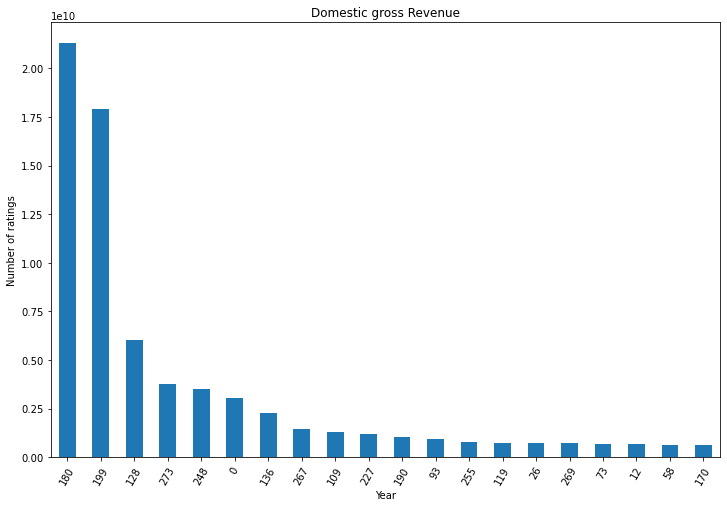

In [48]:
highest_20_grossing = highest_grossing['domestic_gross'].nlargest(20)
highest_20_grossing.plot(x= 'genres', y = 'domestic_gross',kind='bar',figsize = (12,8));
plt.xticks(rotation = 60)
plt.xlabel('Year')
plt.ylabel('Number of ratings')
plt.title('Domestic gross Revenue')

In [49]:
#lowest grossing film
lowest_grossing = Revenue_df.groupby(['genres'])['domestic_gross'].sum().reset_index().sort_values(by = ['domestic_gross'], ascending=False)

print("Highest Grossing Main Genre is: ")
display(lowest_grossing[lowest_grossing.domestic_gross == lowest_grossing.domestic_gross.min()])

Highest Grossing Main Genre is: 


,genres,domestic_gross
57,"Adventure,Animation,Biography",0.0


In [50]:
#Top 20 lowest grossing films by domestic_gross
lowest_grossing = Revenue_df.groupby(['genres'])['domestic_gross'].sum().reset_index().sort_values(by = ['domestic_gross'], ascending=True)
lw = lowest_grossing.head(20)

In [51]:
longest_films = tb.loc[:, ['genres','runtime_minutes','primary_title']].sort_values(by= 'runtime_minutes', ascending = False)
longest_films.head(20)

,genres,runtime_minutes,primary_title
132389,Documentary,51420.0,Logistics
44840,Documentary,14400.0,Modern Times Forever
123467,Documentary,6017.0,Nari
87264,"Documentary,Drama",6000.0,Hunger!
88717,"Comedy,Drama,Mystery",5460.0,London EC1
90578,"Drama,Western",4980.0,Ember Glow
15381,"Comedy,Drama",4200.0,Deregulation
105225,"Documentary,Drama",4080.0,Nieuwe Tieten
12974,"Documentary,Drama,News",3450.0,City of Eternal Spring
67437,Drama,3077.0,A 2nd generation film


In [52]:
shortest_films = tb.loc[:, ['genres','runtime_minutes','primary_title']].sort_values(by= 'runtime_minutes', ascending = True)
shortest_films.head(20)

,genres,runtime_minutes,primary_title
2570,Animation,1.0,Lamentation For Little Girls Who Are In Love W...
72190,"Adventure,Documentary,Sport",1.0,Powered By Green Smoothies
54307,"Documentary,Music",1.0,Guerreiros da paz e poesia: It All Depends on Us
57140,"Adventure,Documentary",1.0,Shark Sanctuary
93214,Documentary,1.0,Great Valley Nature Center Documentary
95787,Documentary,1.0,A Serendipitous Exploration
114067,"Documentary,News",1.0,One Minute Of Resistance
125975,Documentary,1.0,"parTy boi, black diamonds in ice castles"
22903,"Documentary,Family",1.0,Tierra
136059,"Comedy,Short",1.0,Summer Love


In [53]:
#create column for number of words in the primary title
tb['PT_number_of_words'] = pd.DataFrame(tb['primary_title'].apply(lambda n: len(n.split())))
print(tb.head())

      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  PT_number_of_words  
0        2013            175.0    Action,Crime,Drama                   1  
1        2019            114.0       Biography,Drama                   6  
2        2018            122.0                 Drama                   6  
3        2018             87.0          Comedy,Drama                   3  
4        2017             80.0  Comedy,Drama,Fantasy                   4  


In [54]:
# most common number of words in movies
pt_common = tb['PT_number_of_words'].value_counts()
pt_common

2     36640
3     30215
1     26150
4     19688
5     11664
6      6576
7      3986
8      2385
9      1451
10      846
11      495
12      278
13      146
14       72
15       56
16       39
17       17
18        9
19        3
21        3
20        2
40        1
29        1
30        1
47        1
22        1
Name: PT_number_of_words, dtype: int64

In [55]:
#stats for the number of words in movies
pt_stats = tb['PT_number_of_words'].describe()
pt_stats

count    140726.000000
mean          3.190839
std           2.036520
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          47.000000
Name: PT_number_of_words, dtype: float64

Text(0.5, 1.0, 'Preferred number of words for movies')

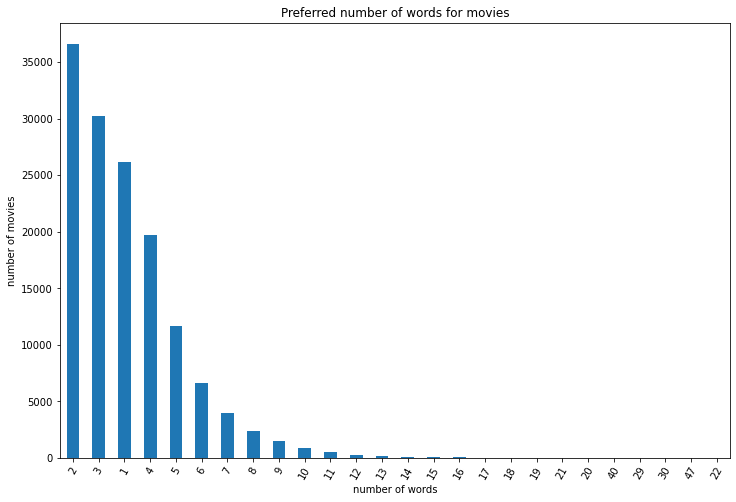

In [56]:
# most common number of words in movies
pt_common.plot(kind='bar',figsize = (12,8));
plt.xticks(rotation = 60)
plt.xlabel('number of words')
plt.ylabel('number of movies')
plt.title('Preferred number of words for movies')

# Recommendations:
Based on the above findings, Microsoft should invest in:

1.Documentary, Drama and Comedy as they are the highest grossing films based on the domestic gross data. There was plenty of missing data for the foreign gross, hence we did not use it. Movies with a genre focus seem to gross better than movies with a combination of genres. The least performing genres had a combination of genres. They included  (Adventure,Animation,Biography), (Comedy,Family,Fantasy), (Documentary,Mystery)    

2.Movies with the highest ratings were (Comedy,Drama),(Horror,Thriller),(Documentary). Once again we see the Documentary making a strong comeback here. This should be one of genres that Microsoft should be keen on investing in. The Comedy and Drama genres, although a combination are also highly rated. This proves our first point even further.

3.The number of films being started since 2020 have significantly reduced. The variety of genres has reduced as well. The most common genres since 2020 are (Action, Drama & Animation). This is a point of interest that Microsoft should look into. Why have the many varieties of movie genres reduced significantly since 2020?

4.The most common length of films is between 85-88 minutes. The length of films has significantly reduced over the years. 

5.Most movies had primary titles with less than 3 words.